In [3]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import csv
import numpy as np

In [4]:
# Data Extraction

# Read GeoJSON file using GeoPandas
data = gpd.read_file("Atlanta Block Group shapefiles/atl_bg.geojson")

# Extract polygons from the GeoJSON file
polygons = [i for i in data["geometry"]]

How does the geo data look like?

In [31]:
data.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,INTPTLON,index_right,NAME,CLASS,ST,STFIPS,PLACEFIPS,POP2010,STPLFIPS,geometry
0,13,121,009301,2,131210093012,1500000US131210093012,Block Group 2,G5030,S,531031,...,-084.3831801,179,Atlanta,city,GA,13,04000,420003,1304000,"POLYGON ((-84.38742 33.82290, -84.38741 33.823..."
1,13,121,009105,1,131210091051,1500000US131210091051,Block Group 1,G5030,S,470960,...,-084.3887486,179,Atlanta,city,GA,13,04000,420003,1304000,"POLYGON ((-84.39386 33.80639, -84.39383 33.806..."
2,13,121,009408,1,131210094081,1500000US131210094081,Block Group 1,G5030,S,83775,...,-084.3591180,179,Atlanta,city,GA,13,04000,420003,1304000,"POLYGON ((-84.36027 33.82910, -84.36024 33.829..."
3,13,121,000602,1,131210006021,1500000US131210006021,Block Group 1,G5030,S,200708,...,-084.4022128,179,Atlanta,city,GA,13,04000,420003,1304000,"POLYGON ((-84.40752 33.78763, -84.40728 33.787..."
4,13,121,007809,2,131210078092,1500000US131210078092,Block Group 2,G5030,S,2679809,...,-084.5349736,179,Atlanta,city,GA,13,04000,420003,1304000,"POLYGON ((-84.54838 33.71537, -84.54687 33.715..."


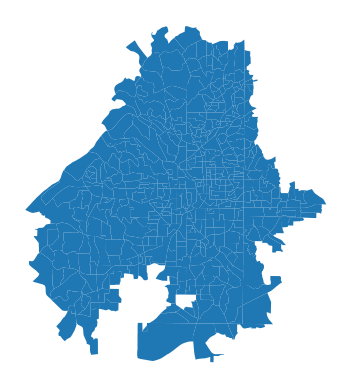

In [34]:
ax = data.geometry.plot()
ax.set_axis_off()

In [84]:
data.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'GEOID', 'GEOIDFQ',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'index_right', 'NAME', 'CLASS', 'ST', 'STFIPS', 'PLACEFIPS',
       'POP2010', 'STPLFIPS', 'geometry'],
      dtype='object')

In [88]:
data = data.drop(['index_right'], axis=1)
data.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'GEOID', 'GEOIDFQ',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'NAME', 'CLASS', 'ST', 'STFIPS', 'PLACEFIPS', 'POP2010',
       'STPLFIPS', 'geometry'],
      dtype='object')

In [9]:
place_name = "Atlanta, Georgia"
landuse_features = ox.features_from_place(place_name, tags={'landuse': True})

In [54]:
landuse_features.shape

(1577, 102)

In [55]:
landuse_features.head()

geometry addr:city addr:housenumber  \
element_type osmid                                                              
node         358680038  POINT (-84.35215 33.76388)   Atlanta             1080   
             358705807  POINT (-84.52382 33.74733)       NaN              NaN   
             358709012  POINT (-84.51965 33.74344)       NaN              NaN   
             358733263  POINT (-84.49493 33.70178)       NaN              NaN   
             358733365  POINT (-84.38993 33.70191)       NaN              NaN   

                       addr:postcode addr:state              addr:street  ele  \
element_type osmid                                                              
node         358680038         30307         GA  Euclid Avenue Northeast  308   
             358705807           NaN        NaN                      NaN  247   
             358709012           NaN        NaN                      NaN  247   
             358733263           NaN        NaN                      NaN  271   
             358733365           NaN        NaN                      NaN  268   

                       gnis:county_id gnis:created gnis:feature_id  ...  lit  \
element_type osmid                                                  ...        
node         358680038            121   09/25/1979          310848  ...  NaN   
             358705807            121   09/25/1979          323936  ...  NaN   
             358709012            121   09/25/1979          325294  ...  NaN   
             358733263            121   09/01/1992          338967  ...  NaN   
             358733365            121   09/01/1992          338993  ...  NaN   

                       surface plant:output:hot_water utility opening_date  \
element_type osmid                                                           
node         358680038     NaN                    NaN     NaN          NaN   
             358705807     NaN                    NaN     NaN          NaN   
             358709012     NaN                    NaN     NaN          NaN   
             358733263     NaN                    NaN     NaN          NaN   
             358733365     NaN                    NaN     NaN          NaN   

                       blind addr:county operator:type ways type  
element_type osmid                                                
node         358680038   NaN         NaN           NaN  NaN  NaN  
             358705807   NaN         NaN           NaN  NaN  NaN  
             358709012   NaN         NaN           NaN  NaN  NaN  
             358733263   NaN         NaN           NaN  NaN  NaN  
             358733365   NaN         NaN           NaN  NaN  NaN  

[5 rows x 102 columns]

In [56]:
landuse_features.geometry.type

element_type  osmid    
node          358680038           Point
              358705807           Point
              358709012           Point
              358733263           Point
              358733365           Point
                               ...     
relation      14030430          Polygon
              14057347          Polygon
              14057348          Polygon
              17339078     MultiPolygon
              17383271     MultiPolygon
Length: 1577, dtype: object

<Axes: >

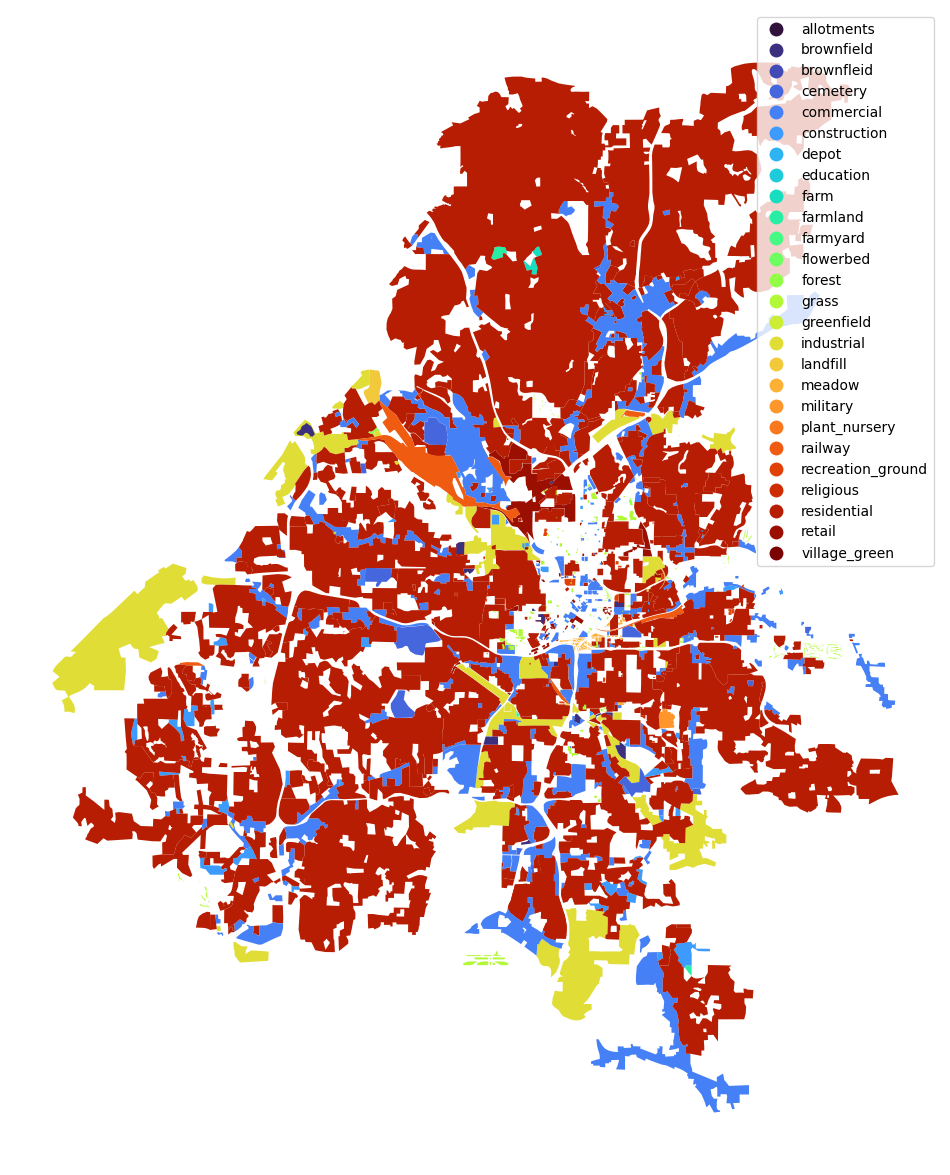

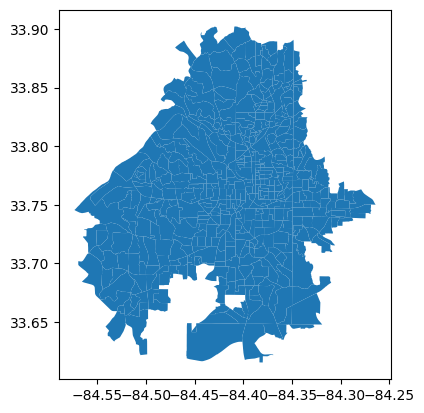

In [82]:
landuse_features_polygons = landuse_features[((landuse_features.type == "Polygon") | 
                                             (landuse_features.type == "MultiPolygon")) &
                                             landuse_features.geometry.to_crs(6438).area > 0]

ax = landuse_features_polygons.plot(column='landuse', cmap='turbo', legend=True, figsize=(15,15))
ax.set_axis_off()

data.geometry.plot()

In [71]:
landuse_features_polygons.shape

(1557, 102)

In [72]:
from collections import Counter

Counter(landuse_features.landuse.dropna())


Counter({'residential': 349,
         'reservoir': 5,
         'retail': 48,
         'quarry': 1,
         'cemetery': 18,
         'commercial': 228,
         'religious': 7,
         'industrial': 57,
         'brownfield': 17,
         'railway': 7,
         'construction': 85,
         'landfill': 1,
         'recreation_ground': 38,
         'farm': 2,
         'farmland': 3,
         'meadow': 56,
         'education': 1,
         'grass': 636,
         'forest': 2,
         'brownfleid': 1,
         'allotments': 1,
         'highway': 2,
         'greenfield': 1,
         'farmyard': 3,
         'plant_nursery': 1,
         'depot': 1,
         'flowerbed': 4,
         'military': 1,
         'village_green': 1})

In [78]:
landuse_features_polygons.reset_index()[['geometry', 'landuse']]

,geometry,landuse
0,"POLYGON ((-84.37248 33.75034, -84.37247 33.750...",cemetery
1,"POLYGON ((-84.44069 33.74604, -84.44339 33.748...",cemetery
2,"POLYGON ((-84.45019 33.72424, -84.45038 33.723...",cemetery
3,"POLYGON ((-84.47840 33.69928, -84.47766 33.698...",commercial
4,"POLYGON ((-84.46550 33.70503, -84.46440 33.704...",commercial
...,...,...
1552,"POLYGON ((-84.35385 33.77731, -84.35315 33.777...",residential
1553,"POLYGON ((-84.31959 33.74190, -84.31952 33.741...",grass
1554,"POLYGON ((-84.32025 33.74058, -84.32029 33.740...",grass
1555,"MULTIPOLYGON (((-84.40306 33.74678, -84.40304 ...",residential


In [108]:
data.crs = {"init": "epsg:4326"}
landuse_features_polygons.crs = {"init": "epsg:4326"}


# Perform spatial join - For each building in Atlanta, find the census block in which it is located.
#result = gpd.tools.sjoin(data, landuse_features_polygons.reset_index()[['geometry', 'landuse']], how="right")
result = data.overlay(landuse_features_polygons.reset_index()[['geometry', 'landuse']], how="intersection", keep_geom_type=False)

d:\GATECH\HPBL\VIP Project\Sp24-Mobility-1\Sp24-Mobility-1\env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [109]:
set(list(result.GEOID))

{'130630403021',
 '130630403081',
 '130630403091',
 '130630403093',
 '130639800001',
 '130890201001',
 '130890201002',
 '130890202001',
 '130890202002',
 '130890203001',
 '130890203002',
 '130890203003',
 '130890204001',
 '130890204002',
 '130890205001',
 '130890205002',
 '130890205003',
 '130890206001',
 '130890206002',
 '130890207001',
 '130890207002',
 '130890208011',
 '130890208012',
 '130890208021',
 '130890208022',
 '130890208023',
 '130890208024',
 '130890209011',
 '130890209012',
 '130890209021',
 '130890209022',
 '130890211032',
 '130890211041',
 '130890214054',
 '130890214151',
 '130890214152',
 '130890214153',
 '130890215021',
 '130890215022',
 '130890215023',
 '130890224011',
 '130890224012',
 '130890224013',
 '130890224014',
 '130890224031',
 '130890224032',
 '130890231012',
 '130890231013',
 '130890234442',
 '130890234443',
 '130890236011',
 '130890236012',
 '130890237011',
 '130890237012',
 '130890237021',
 '130890237022',
 '130890238011',
 '130890238012',
 '130890238013

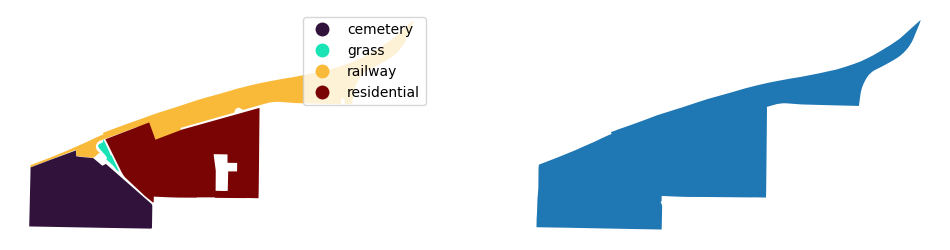

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))

result[result.GEOID == '131210032002'].plot(column='landuse', cmap='turbo', legend=True, ax=ax1)
ax1.set_axis_off()
data[data.GEOID == '131210032002'].plot(ax=ax2)
ax2.set_axis_off()

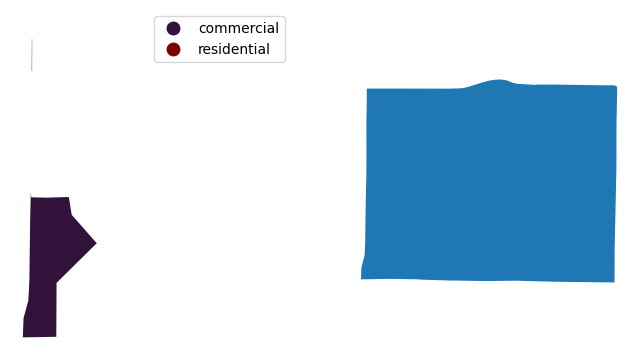

In [124]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))

result[result.GEOID == '130890204001'].plot(column='landuse', cmap='turbo', legend=True, ax=ax1)
ax1.set_axis_off()
data[data.GEOID == '130890204001'].plot(ax=ax2)
ax2.set_axis_off()

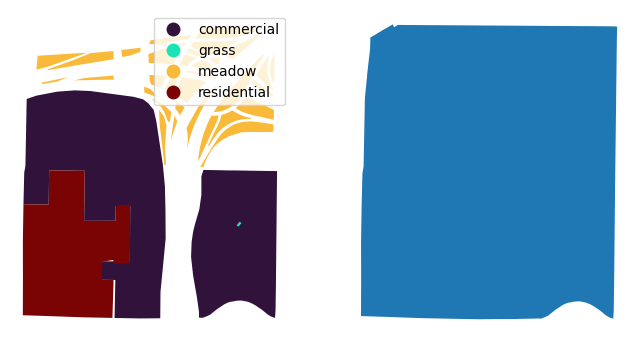

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))

result[result.GEOID == '131210120003'].plot(column='landuse', cmap='turbo', legend=True, ax=ax1)
ax1.set_axis_off()
data[data.GEOID == '131210120003'].plot(ax=ax2)
ax2.set_axis_off()

In [129]:
result[result.GEOID == '131210120003'].head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,INTPTLON,NAME,CLASS,ST,STFIPS,PLACEFIPS,POP2010,STPLFIPS,landuse,geometry
1397,13,121,012000,3,131210120003,1500000US131210120003,Block Group 3,G5030,S,1066579,...,-084.3930210,Atlanta,city,GA,13,04000,420003,1304000,commercial,"POLYGON ((-84.39829 33.74076, -84.39826 33.741..."
1405,13,121,012000,3,131210120003,1500000US131210120003,Block Group 3,G5030,S,1066579,...,-084.3930210,Atlanta,city,GA,13,04000,420003,1304000,residential,"POLYGON ((-84.39831 33.73953, -84.39829 33.740..."
1441,13,121,012000,3,131210120003,1500000US131210120003,Block Group 3,G5030,S,1066579,...,-084.3930210,Atlanta,city,GA,13,04000,420003,1304000,commercial,"POLYGON ((-84.38779 33.74188, -84.38784 33.737..."
1446,13,121,012000,3,131210120003,1500000US131210120003,Block Group 3,G5030,S,1066579,...,-084.3930210,Atlanta,city,GA,13,04000,420003,1304000,meadow,"POLYGON ((-84.39123 33.74344, -84.39130 33.743..."
1447,13,121,012000,3,131210120003,1500000US131210120003,Block Group 3,G5030,S,1066579,...,-084.3930210,Atlanta,city,GA,13,04000,420003,1304000,meadow,"POLYGON ((-84.39039 33.74381, -84.39029 33.743..."


In [158]:
import pandas as pd
data_t = data.to_crs(6438)
def area_of_features(group):
    # Calculate land use area dictionary
    landuse_area_dict = group.groupby('landuse').apply(lambda x: x.geometry.area.sum()).to_dict()
    landuse_area_dict = {k: v for k, v in landuse_area_dict.items() if v != 0}

    # Remove certain land use types
    remove = ["aquaculture", "basin", "salt_pond", "railway"]
    valid_landuse_dict = {key: value for key, value in landuse_area_dict.items() if key not in remove}
    
    tract_id = group.iloc[0,:].GEOID
    # Calculate total area Consider the entire tract area not just sum(landuse_area_dict.values())
    area = data_t[data_t.GEOID == tract_id].iloc[0].geometry.area
    
    # Calculate entropy
    k = len(valid_landuse_dict)
    if k > 1:
        denominator = np.log(k)
        numerator = 0
        for j in valid_landuse_dict.keys():
            p = valid_landuse_dict[j] / area
            numerator += p * np.log(p)
        E = -1 * numerator / denominator
    else:
        E = 0  # If only one land use type, entropy is 0

    # total_area = 0
    # for i in range(group.shape[0]):
    #     if group.iloc[i]['landuse'] != feature_value: continue
    #     total_area += group_t.iloc[i].geometry.area

    row_dict = {}
    row_dict['Entropy'] = E
    #row_dict[f'tract_area'] = group['GEOID'][0]#data.to_crs(6438)[data.GEOID == group['GEOID'][0]].geometry.area

    return pd.Series(row_dict)

# Group by tract number and count how many features there are in each tract boundary
landuse_by_tract = result.to_crs(6438).groupby('GEOID', as_index=False).apply(
    area_of_features)

landuse_by_tract.head()

pd.cu

,GEOID,Entropy
0,130630403021,0.000000
1,130630403081,0.779382
2,130630403091,0.995164
3,130630403093,0.516201
4,130639800001,0.083025


In [163]:
sum(landuse_by_tract['Entropy'] == 0)

83

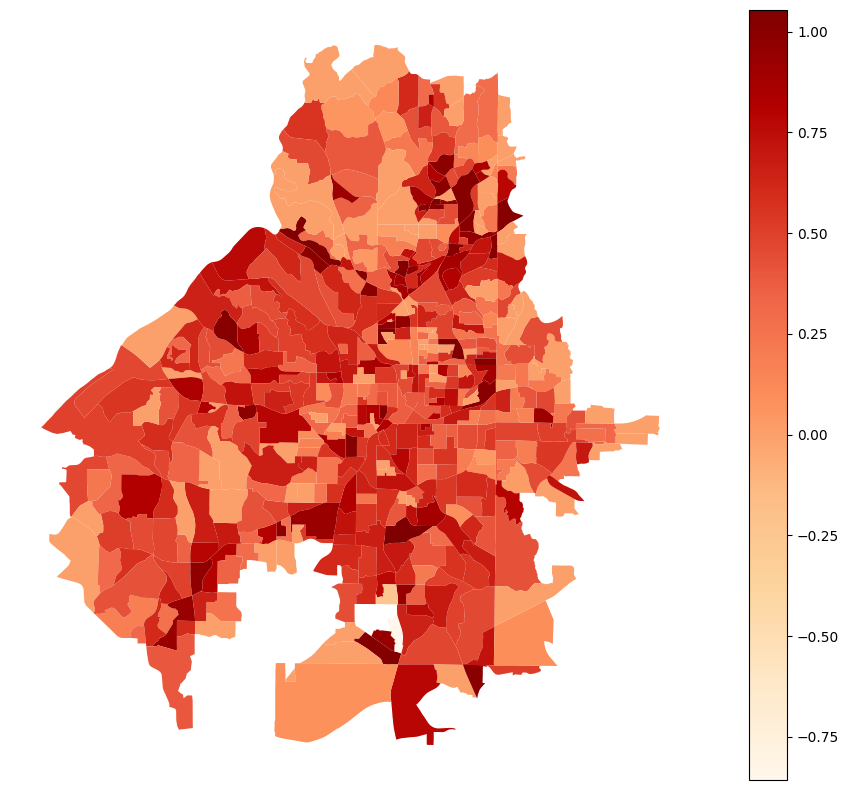

In [162]:
atl_entropy = pd.merge(data, landuse_by_tract, on='GEOID')

ax = atl_entropy.plot(column='Entropy', cmap='OrRd', legend=True, figsize=(15, 10))
ax.set_axis_off()

In [37]:
# Initialize lists to store entropy values and dictionaries
Entropys = []
dictionaries = []

# Loop through polygons and areas
for polygon in polygons:
    try:
        # Extract features from polygon using OSMnx
        gdf = ox.features.features_from_polygon(polygon, tags={'landuse': True})
        
        # Check if GeoDataFrame is empty
        if gdf.empty:
            Entropys.append(0)  # If empty, entropy is 0
            dictionaries.append({})  # Empty dictionary
            continue
    except:
        Entropys.append(0)  # If an exception occurs, entropy is 0
        dictionaries.append({})  # Empty dictionary
        continue
    
    # Convert GeoDataFrame to GeoDataFrame with geometry column
    gdf = gpd.GeoDataFrame(gdf, geometry='geometry')
    
    # Reset index
    gdf.reset_index(inplace=True)
    
    # Convert to CRS 4269
    gdf = gdf.to_crs(epsg=4269)
    
    # Calculate area for each geometry
    gdf["area"] = gdf.geometry.area
    
    # Calculate land use area dictionary
    landuse_area_dict = gdf.groupby('landuse')['area'].sum().to_dict()
    landuse_area_dict = {k: v for k, v in landuse_area_dict.items() if v != 0}
    dictionaries.append(landuse_area_dict)  # Append to dictionaries list
    
    # Remove certain land use types
    remove = ["aquaculture", "basin", "salt_pond", "railway"]
    valid_landuse_dict = {key: value for key, value in landuse_area_dict.items() if key not in remove}
    
    # Calculate total area
    area = sum(landuse_area_dict.values())
    
    # Calculate entropy
    k = len(valid_landuse_dict)
    if k > 1:
        denominator = np.log(k)
        numerator = 0
        for j in valid_landuse_dict.keys():
            p = valid_landuse_dict[j] / area
            numerator += p * np.log(p)
        E = -1 * numerator / denominator
        Entropys.append(E)
    else:
        Entropys.append(0)  # If only one land use type, entropy is 0


/var/folders/f7/jnv35vy91yn53q0rtcj3pklc0000gn/T/ipykernel_79754/3386545909.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.geometry.area
/var/folders/f7/jnv35vy91yn53q0rtcj3pklc0000gn/T/ipykernel_79754/3386545909.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.geometry.area
/var/folders/f7/jnv35vy91yn53q0rtcj3pklc0000gn/T/ipykernel_79754/3386545909.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.geometry.area
/var/folders/f7/jnv35vy91yn53q0rtcj3pklc0000gn/T/ipykernel_79754/3386545909.py:31: UserWarning: Geometry i

In [38]:
maxi = max(Entropys)

# Calculate the IDI 
LDI = [value / maxi for value in Entropys] 

In [39]:
with open('Atlanta_LDI_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Polygon', 'Land_use_dict','Entropy','LDI'])  # Header row

    # Use zip to combine lists into rows
    for polygon, dicts,E,v in zip(polygons, dictionaries, Entropys,LDI):
        writer.writerow([polygon, dicts,E,v])